In [56]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

### Check NaN values and Categories

In [4]:
print(f'{("Column Name").rjust(25)}   {"#NaNs": <10} {"#Unique Values"}')
for column in df.columns:
    uv = df[column].unique()
    if len(uv)>10: uv=""
        
    print(f'{(column).rjust(25)}   {str(df[column].isnull().sum()): <10} {len(df[column].unique())}\t\t{str(uv): <10}')

              Column Name   #NaNs      #Unique Values
                 Car_Name   0          98		          
                     Year   0          16		          
            Selling_Price   0          156		          
            Present_Price   0          147		          
               Kms_Driven   0          206		          
                Fuel_Type   0          3		['Petrol' 'Diesel' 'CNG']
              Seller_Type   0          2		['Dealer' 'Individual']
             Transmission   0          2		['Manual' 'Automatic']
                    Owner   0          3		[0 1 3]   


In [5]:
df_final = pd.DataFrame()
df_final.head()

""


### Car Name
We will not be using this column for now.

### Year
We will use the feature -> (Current Year - Year) = Years_Old\
Eg. 2021 - 2014 = 7

In [6]:
currentYear = date.today().year
print(currentYear)
print(type(currentYear))
print(type(df['Year'][0]))

2021
<class 'int'>
<class 'numpy.int64'>


In [7]:
df_final['Years_Old'] = currentYear - df['Year']
df_final.head()

,Years_Old
0,7
1,8
2,4
3,10
4,7


### Present Price and Kms Driven

In [8]:
df_final['Present_Price'] = df['Present_Price']
df_final['Kms_Driven'] = df['Kms_Driven']
df_final.head()

,Years_Old,Present_Price,Kms_Driven
0,7,5.59,27000
1,8,9.54,43000
2,4,9.85,6900
3,10,4.15,5200
4,7,6.87,42450


### One-Hot Encoding of Fuel Type, Seller Type, Transmission

In [9]:
df_onehot = pd.get_dummies(df[['Fuel_Type', 'Seller_Type', 'Transmission']], drop_first=True)
df_onehot.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1


In [10]:
for feature in df_onehot.columns:
    df_final[feature] = df_onehot[feature]

In [11]:
df_final.head()

,Years_Old,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7,5.59,27000,0,1,0,1
1,8,9.54,43000,1,0,0,1
2,4,9.85,6900,0,1,0,1
3,10,4.15,5200,0,1,0,1
4,7,6.87,42450,1,0,0,1


In [31]:
df_final['Selling_Price'] = df['Selling_Price']
df_final.head()

,Years_Old,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,7,5.59,27000,0,1,0,1,3.35
1,8,9.54,43000,1,0,0,1,4.75
2,4,9.85,6900,0,1,0,1,7.25
3,10,4.15,5200,0,1,0,1,2.85
4,7,6.87,42450,1,0,0,1,4.60


### Correlation HeatMap

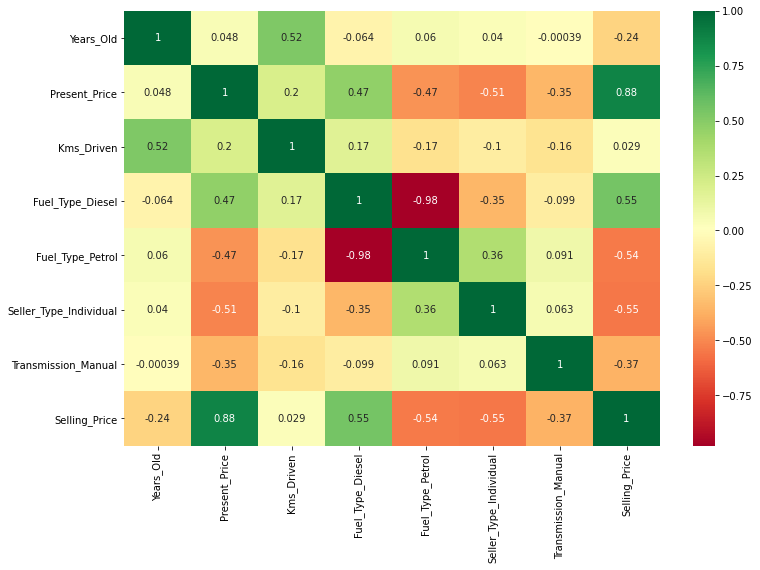

In [32]:
corrmat = df_final.corr()
plt.figure(figsize=(12, 8))
hm = sns.heatmap(corrmat, annot=True, cmap='RdYlGn')

In [34]:
X = df_final.iloc[:,:-1]
y = df_final['Selling_Price']
X.head()

,Years_Old,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7,5.59,27000,0,1,0,1
1,8,9.54,43000,1,0,0,1
2,4,9.85,6900,0,1,0,1
3,10,4.15,5200,0,1,0,1
4,7,6.87,42450,1,0,0,1


### Feature Importance

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [44]:
print(*X.columns, sep='\t')
print(*model.feature_importances_, sep='\t')

Years_Old	Present_Price	Kms_Driven	Fuel_Type_Diesel	Fuel_Type_Petrol	Seller_Type_Individual	Transmission_Manual
0.07734396835511667	0.39275234611905324	0.038920312571882436	0.21350535000932233	0.013404277427196142	0.12677123446041647	0.13730251105701266


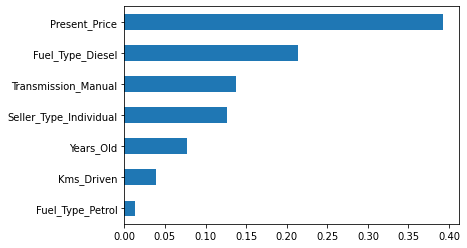

In [47]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh')
plt.show()

### Train-Test Split

In [49]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [50]:
train_x.shape

(240, 7)

In [51]:
test_x.shape

(61, 7)

### Model

In [53]:
from sklearn.ensemble import RandomForestRegressor
clf_rfr = RandomForestRegressor()

In [64]:
# Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
params_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [65]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator=clf_rfr, param_distributions=params_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42)
rscv.fit(train_x, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [71]:
rscv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [72]:
pred = rscv.predict(test_x)
pred

array([ 3.38703,  0.98447,  5.49244,  0.56438,  2.61548,  6.69369,
        7.68946,  5.13426,  3.4285 ,  0.96215,  4.44145,  4.00775,
        7.41364,  0.60246,  3.04795,  0.46414,  3.66652,  0.55369,
       10.71676,  0.98659,  2.43884,  7.51065,  4.559  ,  3.18707,
        3.62498,  7.4836 ,  4.2012 ,  8.0249 ,  4.8083 ,  5.21673,
        4.6279 ,  6.43973,  3.84791,  8.26239, 19.76151, 10.79619,
        5.81273,  0.46869,  1.10779,  8.69805,  0.68228,  8.71827,
        0.48027, 19.14185,  0.30361,  2.27153,  8.50603, 19.67653,
        3.0294 ,  1.50161,  0.67826,  6.31577,  0.36287,  1.01659,
        2.86154,  4.77739,  0.62005,  3.02531,  1.15988,  3.64515,
        1.02225])

### Model Evaluation

/home/sinjoy/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

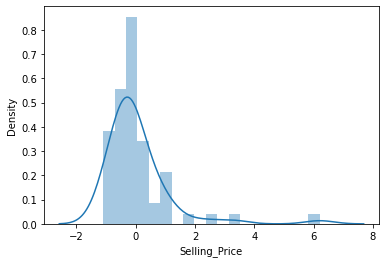

In [75]:
sns.distplot(test_y-pred)

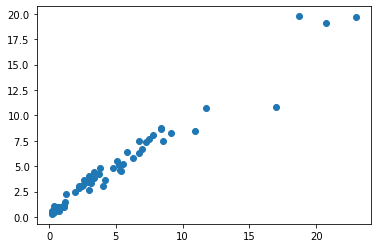

In [76]:
plt.scatter(test_y, pred)

In [78]:
import pickle
with open('model_rfr_rscv.pkl', 'wb') as f:
    pickle.dump(rscv, f)

In [81]:
with open('model_rfr_rscv.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [82]:
loaded_model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)